# **Package Install and Import**
First, we will install and import necessary packages.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Loading the Dataset**
Now we are ready to load the dataset. We will do this using the standard read_csv command from Pandas. Let's take a glimpse at how the data looks like.

In [2]:
netflix = pd.read_csv('/content/netflix_titles.csv', encoding='latin-1')
netflix.head(10)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [3]:
# shape of the dataset
netflix.shape

(8809, 12)

# **Data Preparation and Cleaning**

In [4]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
netflix.isnull().sum().sum()

4307

In [6]:
# checking the null value present in the dataset in percentage
(4307/8809)*100

48.89317743217164

In [7]:
# data preparation and cleaning
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [8]:
netflix.describe()

,release_year
count,8809.000000
mean,2014.181292
std,8.818932
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2024.000000


In [9]:
netflix.nunique()

show_id         8809
type               2
title           8806
director        4529
cast            7694
country          748
date_added      1768
release_year      75
rating            18
duration         220
listed_in        516
description     8777
dtype: int64

# **Handling the null values**


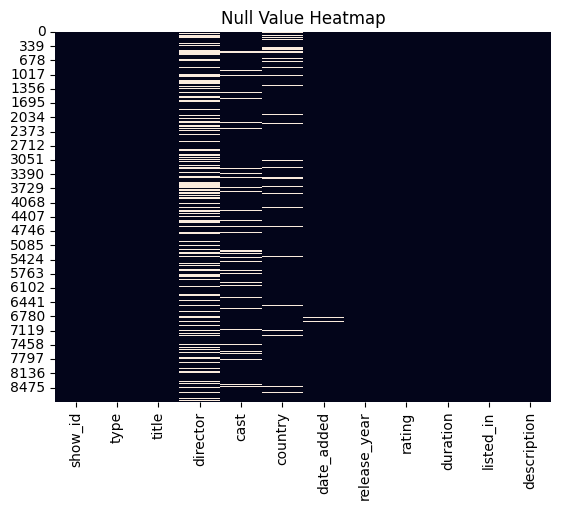

In [10]:
sns.heatmap(netflix.isnull(), cbar = False)
plt.title('Null Value Heatmap')
plt.show()

In [11]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
netflix['director'].fillna('no director',inplace = True)
netflix['cast'].fillna('no cast',inplace = True)
netflix['country'].fillna('no country',inplace = True)
netflix.dropna(inplace = True)

# **Splitting the dataset**
Since the dataset can either contain movies or shows, it'd be nice to have datasets for both so we can take a deep dive into just Netflix movies or Netflix TV shows so we will create two new datasets. One for movies and the other one for shows

In [13]:
netflix.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [14]:
netflix_movie = netflix[netflix['type']== 'Movie'].copy()
netflix_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,no cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",no country,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis NiewÃ¶hner, Milan Peschel,...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [15]:
netflix_tv_show = netflix[netflix['type']=='TV Show'].copy()
netflix_tv_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,no director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",no country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,no director,no cast,no country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,no director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",no country,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


# **Data prepration**
In the duration column, there appears to be a discrepancy between movies and shows. Movies are based on the duration of the movie and shows are based on the number of seasons. To make EDA easier, I will convert the values in these columns into integers for both the movies and shows datasets.

In [16]:
netflix_movie['duration'] = netflix_movie['duration'].astype(str)
netflix_movie.duration = netflix_movie.duration.str.replace(' min','').astype(int)
netflix_tv_show.rename(columns={'duration':'seasons'}, inplace=True)
netflix_tv_show.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
netflix_tv_show.seasons = netflix_tv_show.seasons.str.replace(' Seasons','').astype(int)

# **Exploratory Analysis and Visualization**

In [17]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,no cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,no director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",no country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,no director,no cast,no country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,no director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **Netflix Film Types: Movie or TV Show**
It'd be interesting to see the comparison between the total number of movies and shows in this dataset just to get an idea of which one is the majority.

<ipython-input-18-3a97998316fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(netflix.type, palette = 'muted');


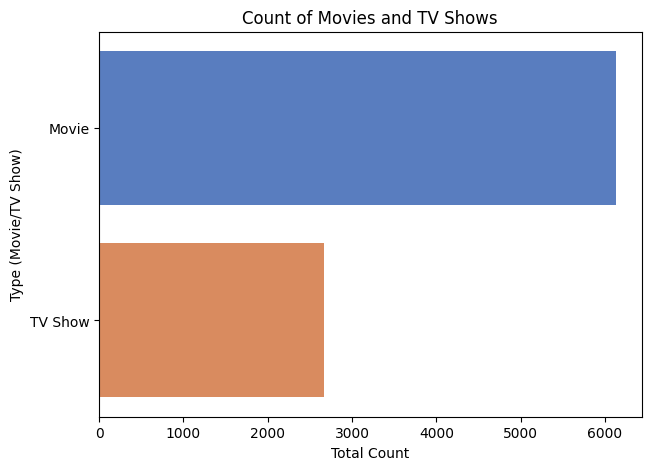

In [18]:
plt.figure(figsize=(7,5))
sns.countplot(netflix.type, palette = 'muted');
plt.title("Count of Movies and TV Shows")
plt.ylabel("Type (Movie/TV Show)")
plt.xlabel("Total Count")
plt.show()

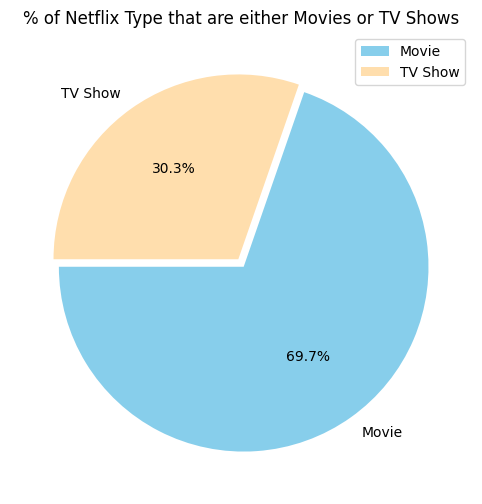

In [ ]:
plt.figure(figsize=(12,6))
plt.title("% of Netflix Type that are either Movies or TV Shows")
plt.pie(netflix.type.value_counts(), explode=(0.025,0.025), labels=netflix.type.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

**Countries with the most content available**

Now we will explore the countries with the most content on Netflix. Films typically are available in multiple countries as shown in the original dataset. Therefore, we need to seperate all countries within a film before we can analyze the data. After seperating countries and removing titles with no countries available, we can plot a Top 10 list to see which countries have the highest availability of films on Netflix. Unsurprisingly, the United States stands out on top since Netflix is an American company. India surprisingly comes in second followed by the UK and Canada. China interestingly is not even close to the top even though it has about 18% of the world's population. Reasons for this could be for political reasons and the banning of certain applications which isn't uncommon between the United States and China.

<ipython-input-43-61c0990f7312>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(netflix['country'], order=netflix['country'].value_counts().index[:10], palette = 'Accent')


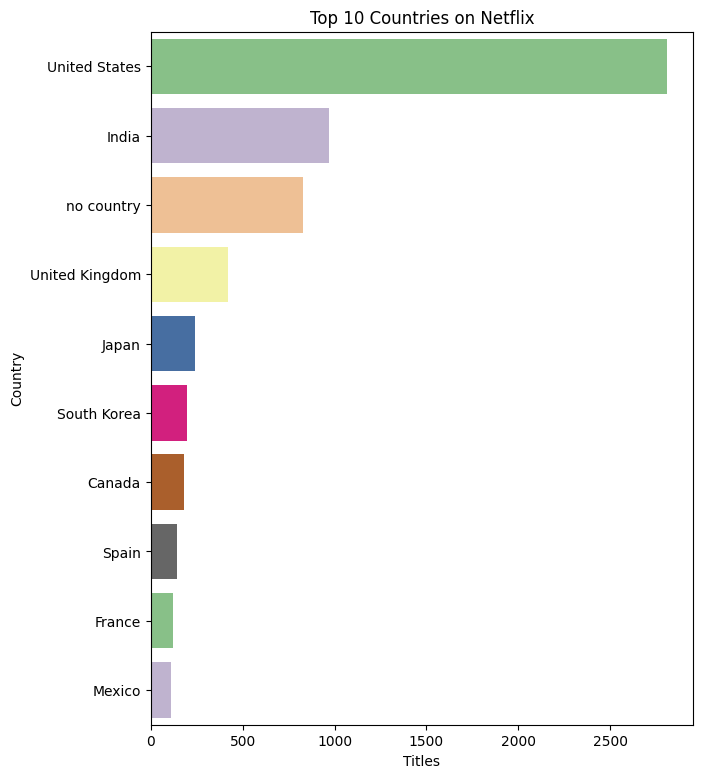

In [43]:
plt.figure(figsize=(7,9))
g = sns.countplot(netflix['country'], order=netflix['country'].value_counts().index[:10], palette = 'Accent')
plt.title('Top 10 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

In [ ]:
netflix.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR', 'A'], dtype=object)

***Netflix Film Ratings***

Now, we will explore the ratings which are based on the film rating system. The ordering of the ratings will be based on the age of the respective audience from youngest to oldest. We will not include the ratings 'NR' and 'UR' in the visuals since they stand for unrated and non-rated content

<ipython-input-127-7d9597e25257>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(netflix_movie.rating,order=formate, palette='pastel')


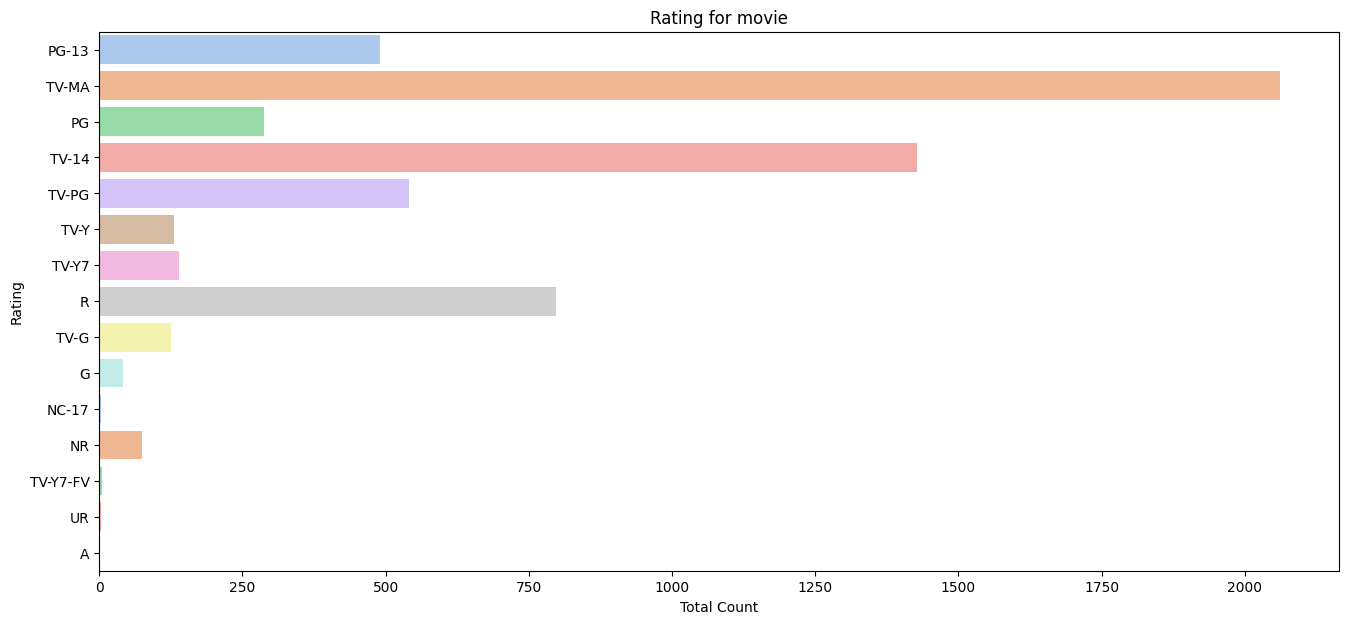

In [ ]:
formate = ['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R','TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR', 'A']
plt.figure(figsize = (16,7))
sns.countplot(netflix_movie.rating,order=formate, palette='pastel')
plt.ylabel('Rating')
plt.xlabel('Total Count')
plt.title("Rating for movie")
plt.show()

<ipython-input-128-00cd6bc439f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(netflix_tv_show.rating,order=formate, palette='pastel')


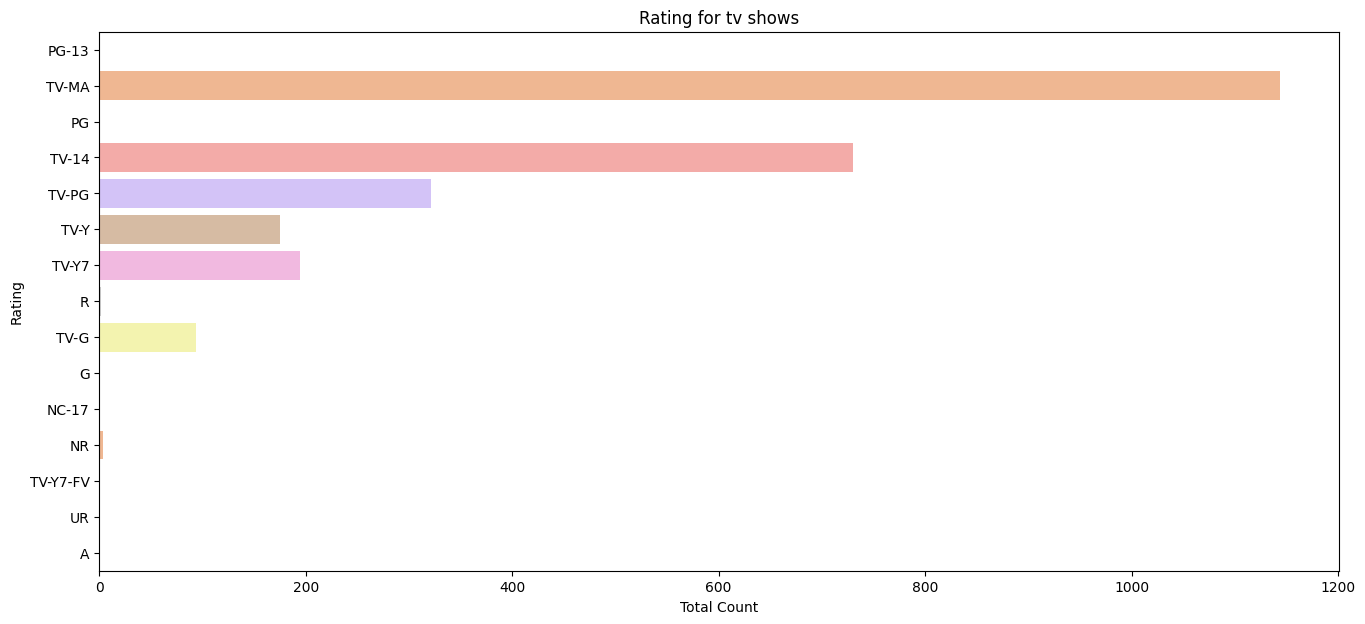

In [ ]:
formate = ['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R','TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR', 'A']
plt.figure(figsize = (16,7))
sns.countplot(netflix_tv_show.rating,order=formate, palette='pastel')
plt.ylabel('Rating')
plt.xlabel('Total Count')
plt.title("Rating for tv shows")
plt.show()

Overall, there is much more content for a more mature audience. For the mature audience, there is much more movie content than there are TV shows. However, for the younger audience (under the age of 17), it is the opposite, there are slightly more TV shows than there are movies

# **Content added each year**

In [ ]:
netflix['year_added'] = pd.DatetimeIndex(netflix['date_added']).year
netflix_movie['year_added'] = pd.DatetimeIndex(netflix_movie['date_added']).year
netflix_tv_show['year_added'] = pd.DatetimeIndex(netflix_tv_show['date_added']).year
netflix['month_added'] = pd.DatetimeIndex(netflix['date_added']).month
netflix_movie['month_added'] = pd.DatetimeIndex(netflix_movie['date_added']).month
netflix_tv_show['month_added'] = pd.DatetimeIndex(netflix_tv_show['date_added']).month

# **Content added each year**
Now we will take a look at the amount content Netflix has added throughout the previous years. Since we are interested in when Netflix added the title onto their platform, we will add a 'year_added' column shows the year of the date from the 'date_added' column as shown above

In [ ]:
netflix_year = netflix['year_added'].value_counts().rename_axis('year').to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
netflix_year = netflix_year[netflix_year.year != 2020]
netflix_year

,year,count
0,2019,2016
2,2018,1648
3,2021,1498
4,2017,1185
5,2016,426
6,2015,82
7,2014,24
8,2011,13
9,2013,11
10,2012,3


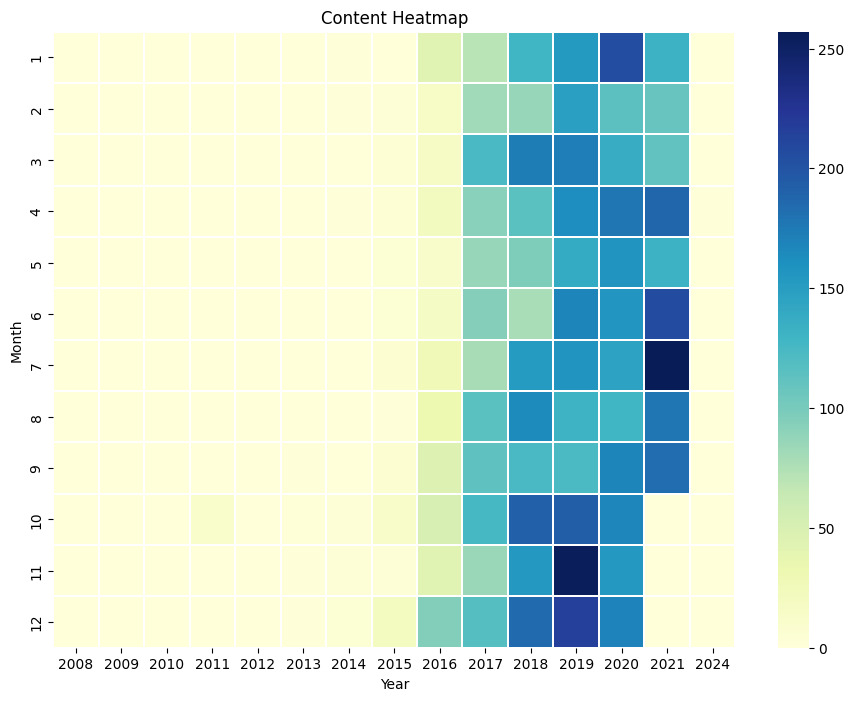

In [ ]:
month_year_df = netflix.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(11,8))
sns.heatmap(month_year_df, linewidths=0.025, cmap="YlGnBu")
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

# **Netflix Film Duration**

<ipython-input-132-cd5fcee9c404>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.distplot(netflix_movie.duration, color='skyblue',ax=ax[0]);


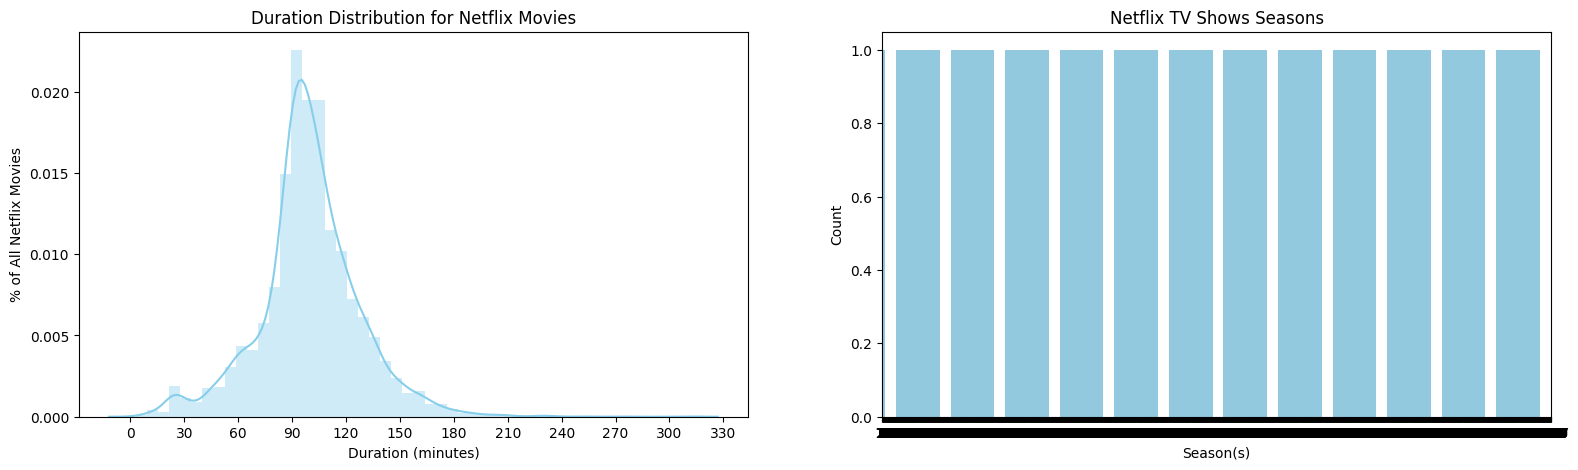

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.distplot(netflix_movie.duration, color='skyblue',ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")
g2 = sns.countplot(netflix_tv_show.seasons, color='skyblue',ax=ax[1]);
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season(s)")
fig.show()

Now we will look into the duration of Netflix films. Since movies are measured in time and shows are measured by seasons, we need to split the dataset between movies and TV shows. Above on the left, we can see that the duration for Netflix movies closely resembles a normal distribution with the average viewing time spanning about 90 minutes which seems to make sense. Netflix TV shows on the other hand seems to be heavily skewed to the right where the majority of shows only have 1 season.

# **Popular Genres**

In terms of genres, international movies takes the cake surprisingly followed by dramas and comedies. Even though the United States has the most content available, it looks like Netflix has decided to release a ton of international movies. The reason for this could be that most Netflix subscribers aren't actually in the United States, but rather the majority of viewers are actually international subscribers.

<ipython-input-54-4b50195f6383>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(y = filtered_genres,palette = 'CMRmap')


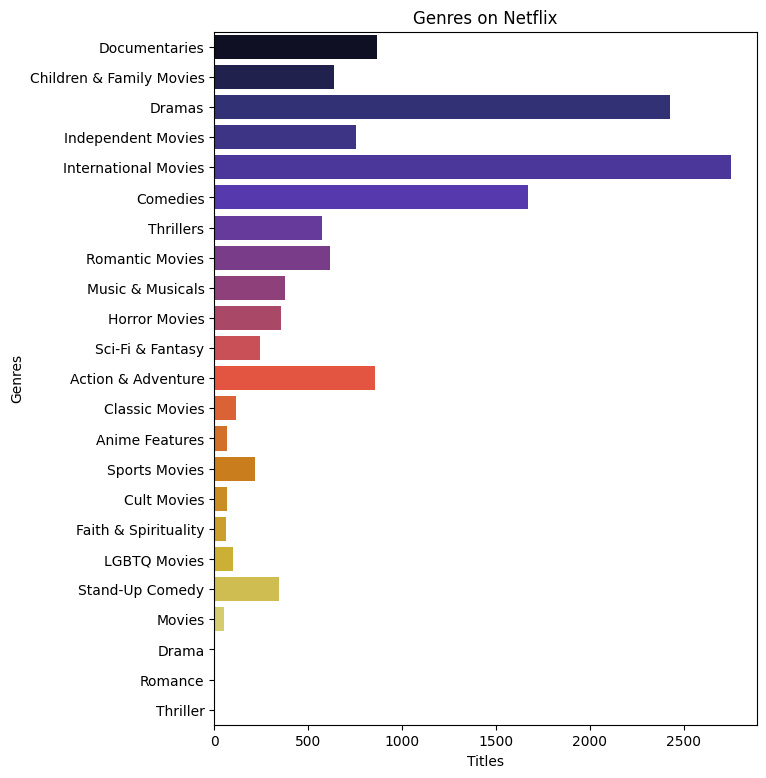

In [54]:
filtered_genres = netflix_movie.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_genres,palette = 'CMRmap')
plt.title('Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In terms of genres, international movies takes the cake surprisingly followed by dramas and comedies. Even though the United States has the most content available, it looks like Netflix has decided to release a ton of international movies. The reason for this could be that most Netflix subscribers aren't actually in the United States, but rather the majority of viewers are actually international subscribers.

# **Inferences and Conclusion**
It's clear that Netflix has grown over the years. We can see it from the data that the company took certain approaches in their marketing strategy to break into new markets around the world. Based on an article from Business Insider, Netflix had about 158 million subscribers worldwide with 60 million from the US and almost 98 million internationally. Netflix's original subscriber base was based solely in the United States following its IPO. A large part of its success was due to the decision to expand to international markets. The popular markets prioritizes what content the company will release. In this case, we can see that a good amount of international movies and TV shows were added over the years as part of Netflix's global expansion.